## A/B Testing in Python
Description: 
    
   Let’s imagine we work on the product team at a medium-sized online e-commerce business. The UX designer worked really hard on a new version of the product page, with the hope that it will lead to a higher conversion rate. The product manager (PM) told we that the current conversion rate is about 13% on average throughout the year, and that the team would be happy with an increase of 2%, meaning that the new design will be considered a success if it raises the conversion rate to 15%. 
    
   Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so we suggest running an A/B test on a subset of our user-base users.
   
Here's the dataset link:
https://www.kaggle.com/datasets/zhangluyuan/ab-testing?select=ab_data.csv

## Choosing the variables
For our test we’ll need two groups:

    A control group - They'll be shown the old design
    A treatment (or experimental) group - They'll be shown the new design

This will be our Independent Variable. These two variables will be viewed clearer in the 'group' column in the table below.


For our Dependent Variable (i.e. what we are trying to measure), we are interested in capturing the conversion rate. A way we can code this is by each user session with a binary variable:

    0 - The user did not buy the product during this user session
    1 - The user bought the product during this user session

This way, we can easily calculate the mean for each group to get the conversion rate of each design.

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# display full outputs in Jupyter Notebook, not only the last command's output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('D:/Projects/AB Test/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.info

<bound method DataFrame.info of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[294478 rows x 5 co

In [6]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

 ## Make sure all the 'control' group are seeing the 'old_page' landing_page and viceversa
 Use pd.crosstab() to see how many rows have that cross value
 
 Determine those index needed to be eliminated
 
 Use pd.df.drop() to delete rows with those index, set inplace = True to update the dataframe
 
 Use pd.crosstab() to check again 

In [7]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


So there are 1928 'control' group are seeing the 'new_page' page & there are 1965 'treatment' group are seeing the 'old_page'.

We need to eliminate these rows and keep the rest.

In [8]:
indexnames = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].index
df.drop(indexnames , inplace=True)
df.shape

(292550, 5)

In [9]:
df1 = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df1

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [10]:
df1.index

Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=1965)

In [11]:
df.drop(df1.index, inplace=True)
df.shape

(290585, 5)

In [12]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


After strip down those rows & before we go ahead and sample the data to get our subset, let’s make sure there are no users that have been sampled multiple times. 

And in fact, we only need the 'group' and the 'converted' column to conduct the testing

In [13]:
id_count =  df['user_id'].value_counts(ascending=False)
id_count

773192    2
851104    1
688307    1
718297    1
838144    1
         ..
755610    1
804629    1
837875    1
889019    1
715931    1
Name: user_id, Length: 290584, dtype: int64

In [14]:
repeated_id = id_count[id_count > 1].count()
repeated_id

1

Luckily only 1 ID happens to appear more than once in the dataframe, and also as we can see, his id is 773192.

Let's drop him out of business

In [15]:
user_to_drop = id_count[id_count > 1].index
user_to_drop

Int64Index([773192], dtype='int64')

In [16]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df.shape

(290585, 5)

In [18]:
df[df['user_id'] == 773192].index

Int64Index([1899, 2893], dtype='int64')

In [19]:
df.drop(df[df['user_id'] == 773192].index, inplace=True)

In [20]:
df.shape

(290583, 5)

## Sampling
Now that our DataFrame is nice and clean, we can proceed and sample n entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us.

In [21]:
# import random 
from random import sample

n = 100
control_sample = df[df['group'] == 'control'].sample(n, random_state=5)
treatment_sample = df[df['group'] == 'treatment'].sample(n, random_state=5)

After taking n samples from both control and treatment group from our df, next step is to concat both into 1 new test dataframe using concat()

In [22]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test

,user_id,timestamp,group,landing_page,converted
81828,733817,2017-01-24 07:44:29.778551,control,old_page,0
87887,727029,2017-01-07 17:48:24.217339,control,old_page,0
256104,640558,2017-01-12 13:51:32.274386,control,old_page,0
156599,823897,2017-01-23 11:22:03.406196,control,old_page,0
9117,708460,2017-01-12 03:41:12.102716,control,old_page,0
...,...,...,...,...,...
243776,663431,2017-01-09 10:00:49.571989,treatment,new_page,0
244229,872570,2017-01-17 19:18:30.043970,treatment,new_page,0
270563,738407,2017-01-19 13:26:52.564536,treatment,new_page,0
220307,910552,2017-01-08 05:04:16.050474,treatment,new_page,0


As the shown table above, the indexes are all messed up, pd.df.reset_index() will help us reseting the indexes

In [23]:
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,733817,2017-01-24 07:44:29.778551,control,old_page,0
1,727029,2017-01-07 17:48:24.217339,control,old_page,0
2,640558,2017-01-12 13:51:32.274386,control,old_page,0
3,823897,2017-01-23 11:22:03.406196,control,old_page,0
4,708460,2017-01-12 03:41:12.102716,control,old_page,0
...,...,...,...,...,...
195,663431,2017-01-09 10:00:49.571989,treatment,new_page,0
196,872570,2017-01-17 19:18:30.043970,treatment,new_page,0
197,738407,2017-01-19 13:26:52.564536,treatment,new_page,0
198,910552,2017-01-08 05:04:16.050474,treatment,new_page,0


In [24]:
ab_test['group'].value_counts()

control      100
treatment    100
Name: group, dtype: int64

In [25]:
import scipy.stats as stats
conversion_rates = ab_test.groupby('group')['converted']
std_p = lambda x: np.std(x, ddof=0)                                       # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)                                     # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.130,0.336,0.034
treatment,0.120,0.325,0.032


## Visualize the result

<Figure size 432x648 with 0 Axes>

<AxesSubplot:xlabel='group', ylabel='converted'>

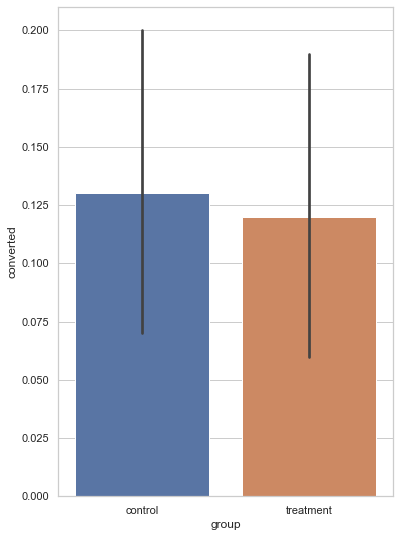

In [26]:
plt.figure(figsize=(6,9))
sns.set_theme(style="whitegrid")
sns.barplot(x=ab_test['group'], y=ab_test['converted'])
plt.show()

Looking at the stats above, it is clearly that both of our designs performed very similarly, with the Conversion Rate of the control group (13%) slightly higher than that of the treatment group (12%) which means the old design is better than the new one. 

To further support our conclusion, we need to conduct the Hypothesis Testing on Normal Distribution. 

## Hypothesis Testing | P-value approach
For better or worse, we assume our new design will perform different from our old design with the confidence level at 95%. Meaning we have to reject the null Hypothesis which call out the new design has the same performance with the old one. 

So we have:

We test a sample of 100 users & find the conversion rate of the treatment group to be 12% with a standard deviation to be 0.325. 

Assume we set the confidence level at 95%, our null hypothesis is 'With confidence level at 95%, assume the new design'll have the same conversion rate with the old design'

    The Mu value (μ) represent the conversion rate
    The n value (n) represent the number of our testing users
    The s shorten for Standard Deviation
    
Our main goal is to reject the null hypothesis using p-value method. 

## Solution:

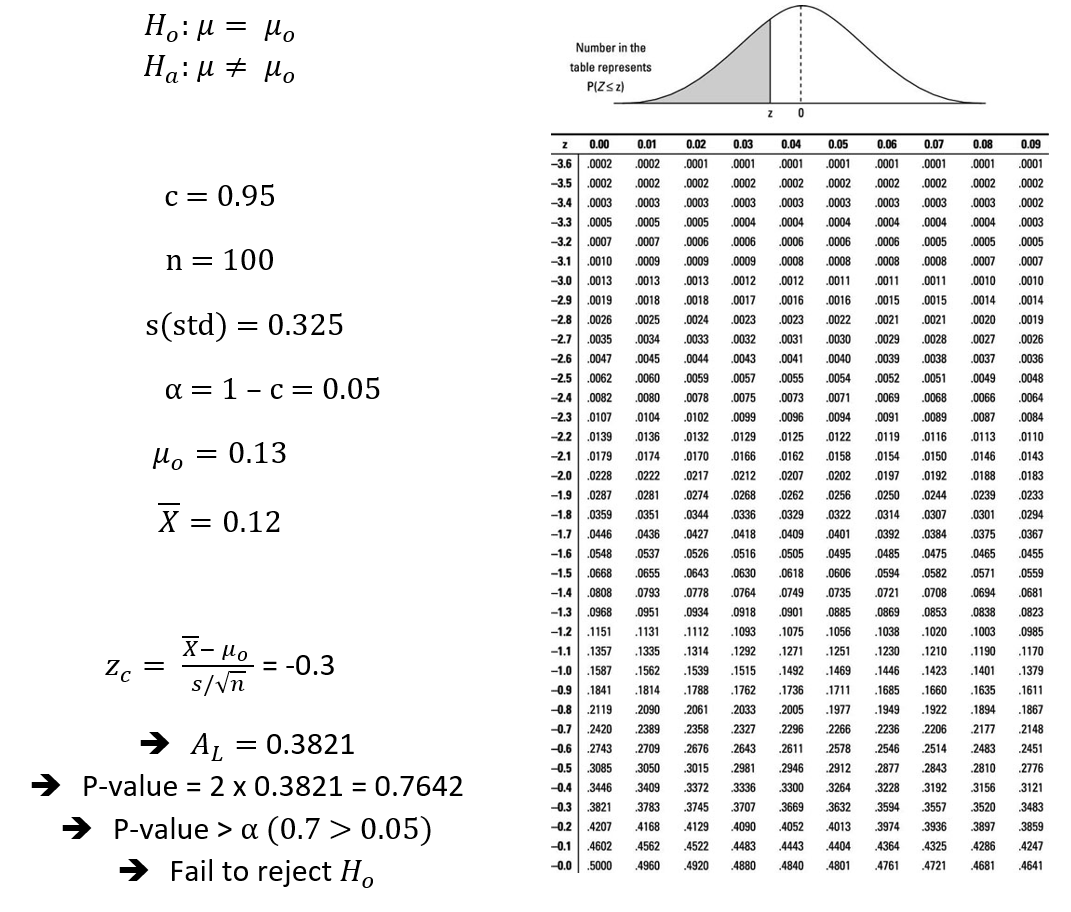

In [44]:
import math
import scipy.stats as stats

# Calculate the results
z_score = (0.12 - 0.13) / (0.325 / math.sqrt(100)) 
p_value = float(stats.norm.cdf(z_score)) * 2

# Print our results
print('The p-value is ' + "%.2f" % round(p_value, 2) + ' for a z-score of ' + "%.2f" % round(z_score, 2))

The p-value is 0.76 for a z-score of -0.31


## Conclusion:
Since our P-value (0.7) is much higher than the alpha (0.05), we can not reject the null hypothesis meanning we can not deny that the new design does not perform any different than the old one let alone anything better !

Both Testings have the same suggestion that we can not replace the old version of the product page with the new one that do not improve anything. Better try a different approach to the business. 